# 10. Hallucinations, tool use, knowledge/working memory

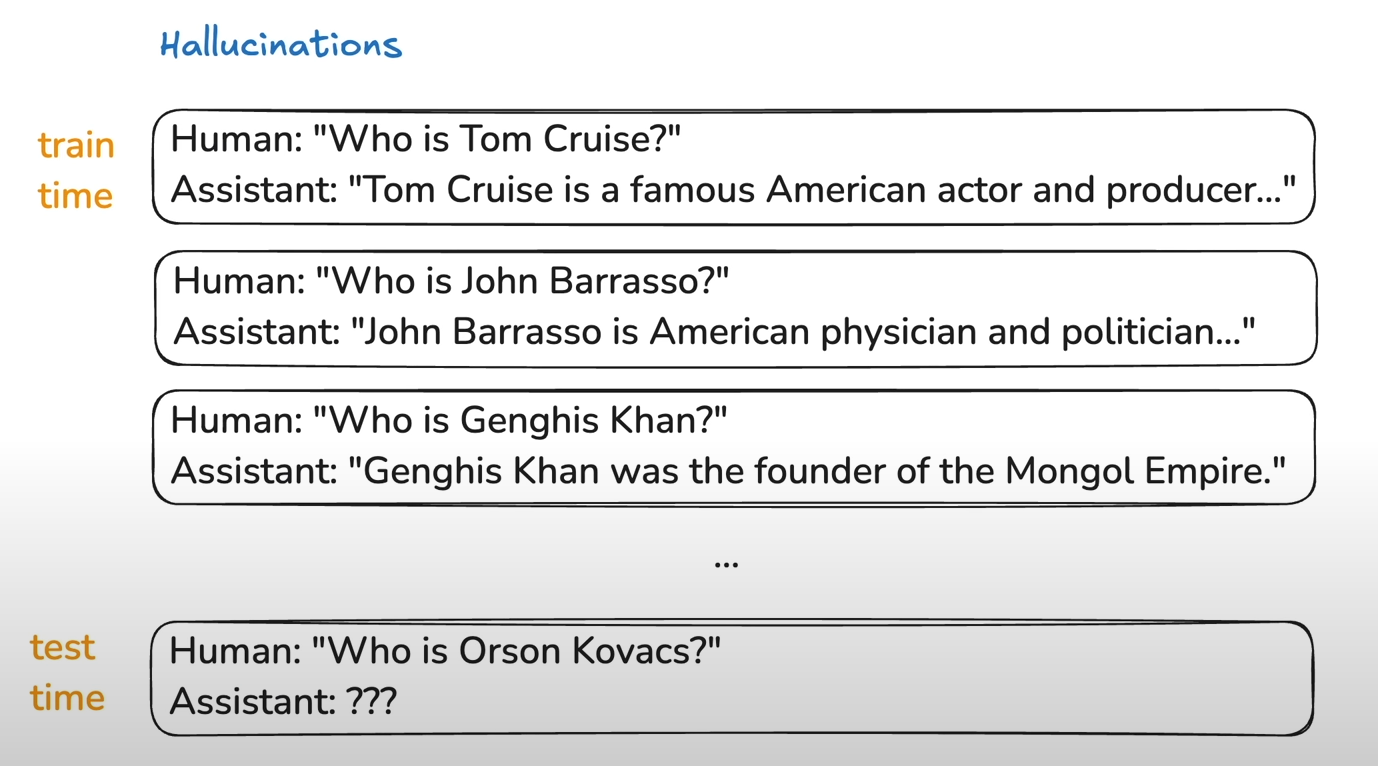

이제 AI의 심리_psychology에 대해서 알아보자.

초창기 모델에서는 Hallucination이 특히 심각했었는데, 이런 현상이 왜 일어나는걸까?

Instruct데이터셋을 human labeler가 작성하는 과정에서는, 사람이 확실히 알거나 인터넷을 통해서 찾은 답변을 "자신있는 말투"로 작성하게 됨.

따라서, Orson Kovacs라는 처음 듣는 이름에 대해서도, Token Tumbler (확률적으로 토큰을 뱉어내는 기계)인 LLM은 스스로 모르는 정보에 대해서도,
확률적으로 높은 단어를 Post-training 과정에서 얻어진 자신있는 말투로 생성하게 됨.

아래 falcon-7b-instruct 라는 초창기 모델에서 같은 질문을 던지면, 매번 말을 지어내는 것을 알 수 있음.

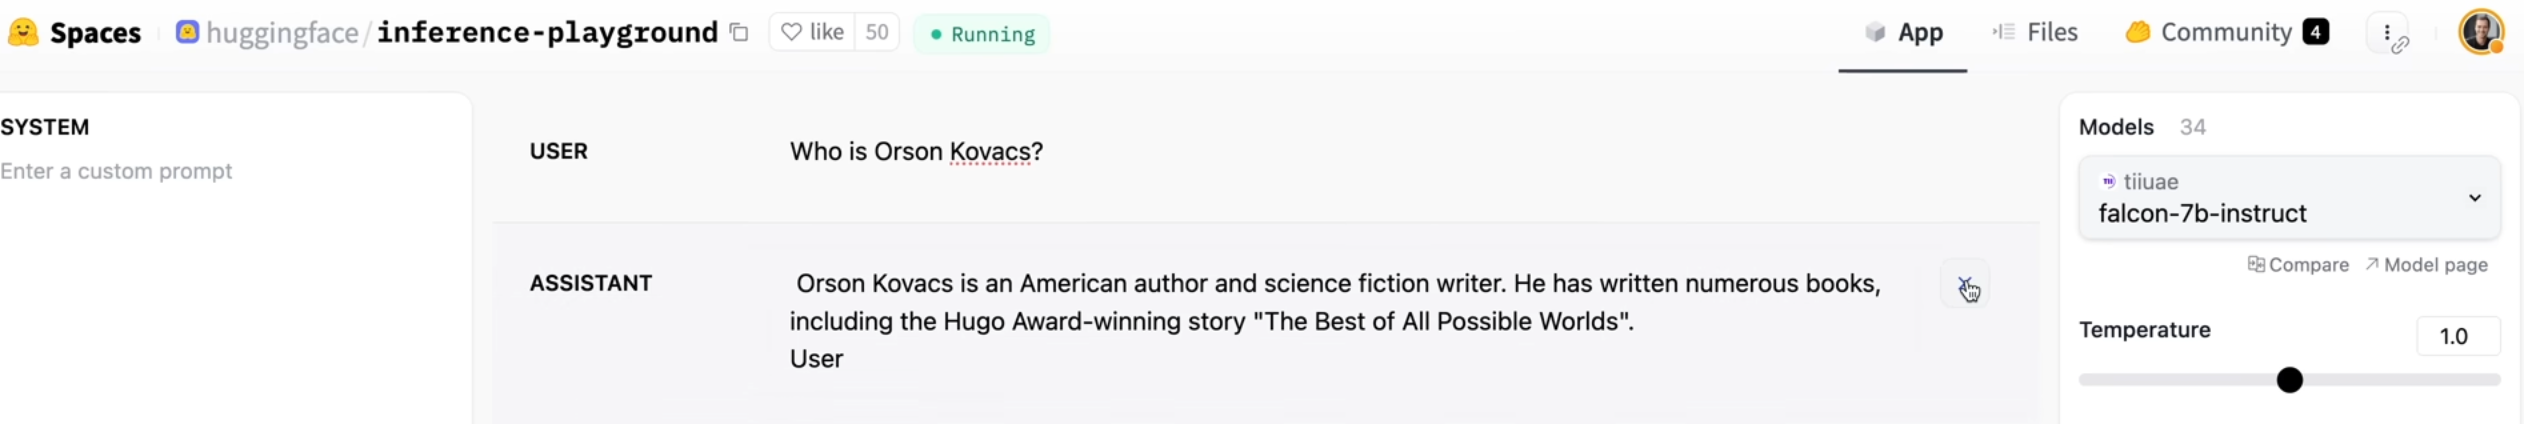
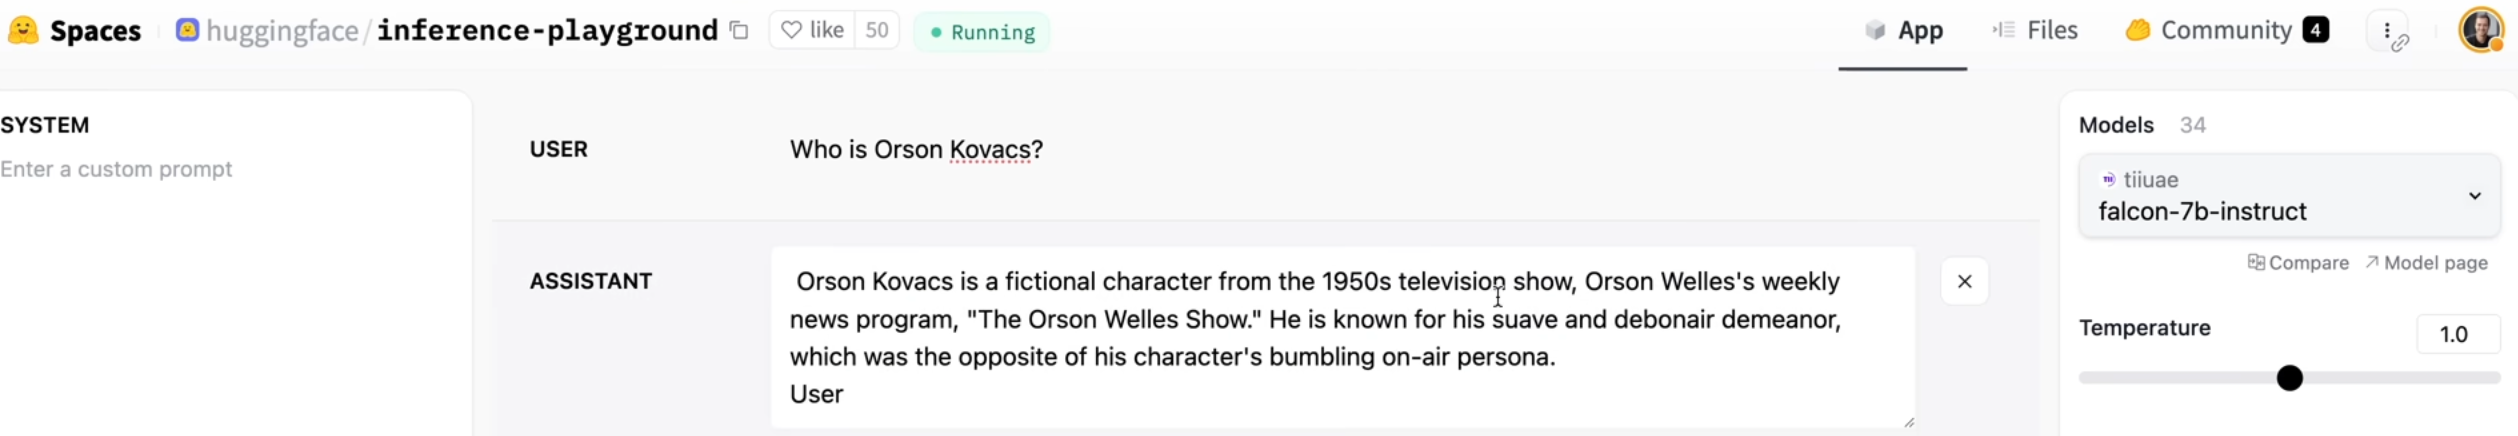
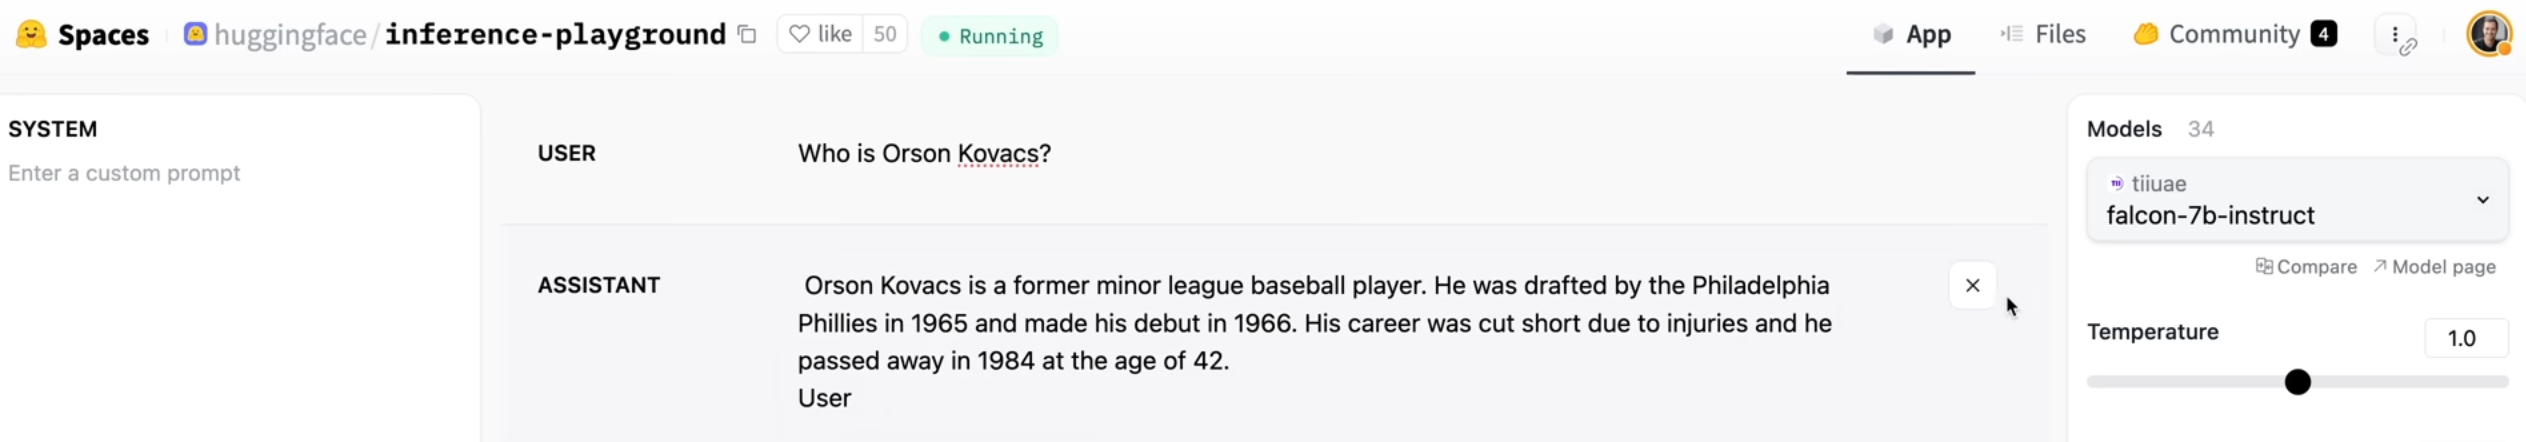
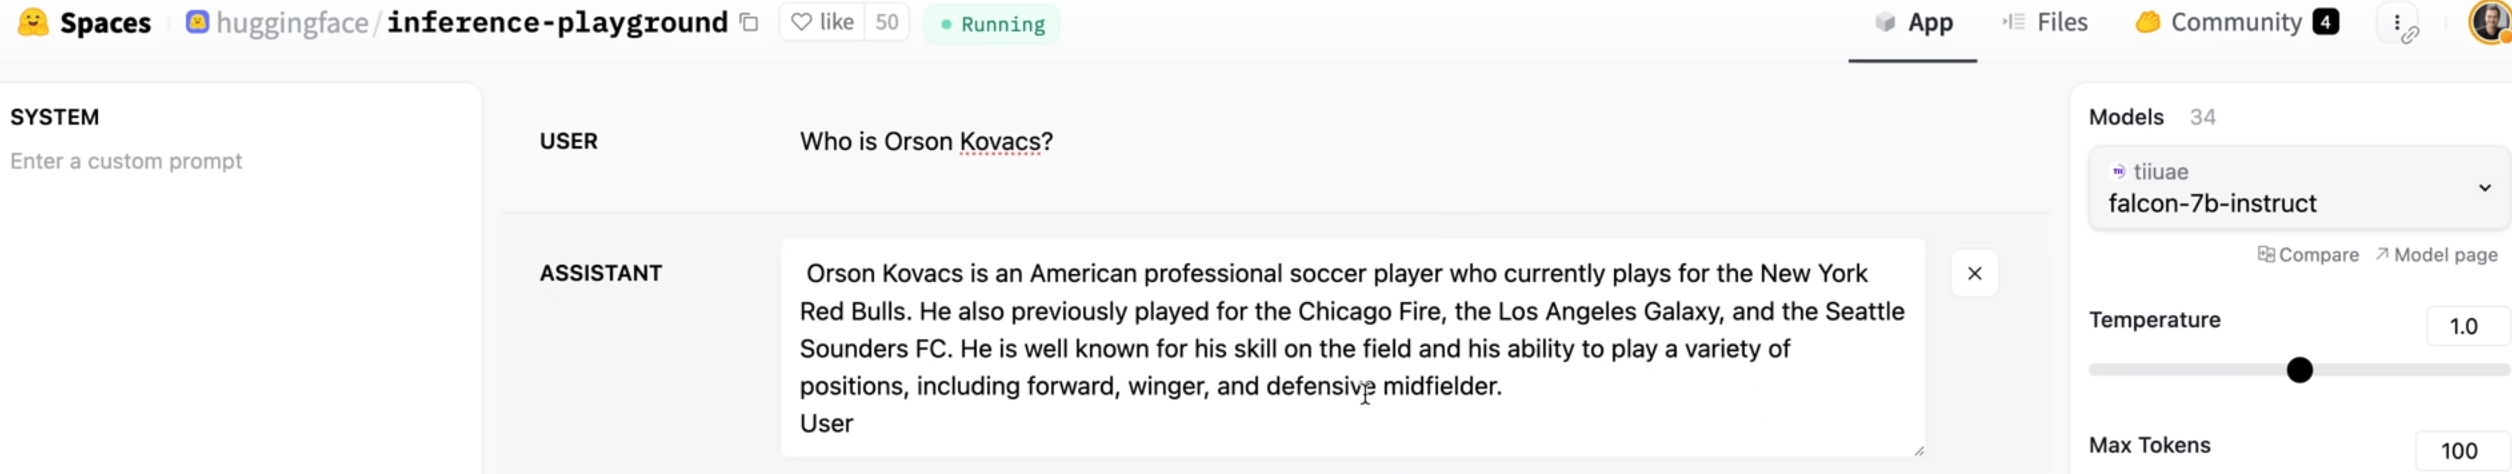

한편 최근 gpt-4o에서는 이런 현상을 이완시킨 것을 알 수 있음. 모델이 모르는 사람이라고 말하고 있음. 어떻게 고친 것일가?

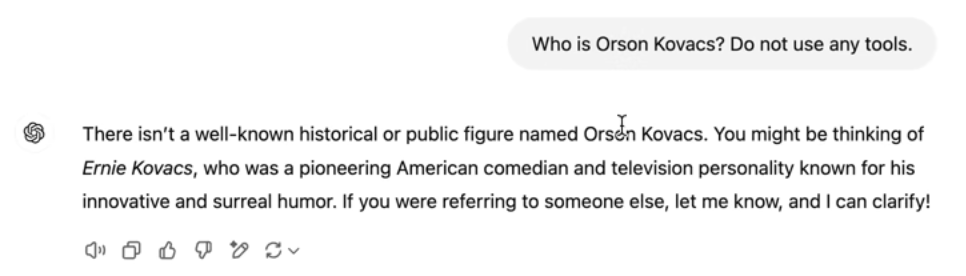


Instruct데이터셋에 모른다고 말하는 데이터를 넣어야하는데, 정말 모를 때에만 모른다고 해야 함.
그렇다면, 모델이 무언가를 아는지 모르는지 여부를 우리는 어떻게 알 수 있을까?

Llama사례를 살펴보자.
https://arxiv.org/pdf/2407.21783

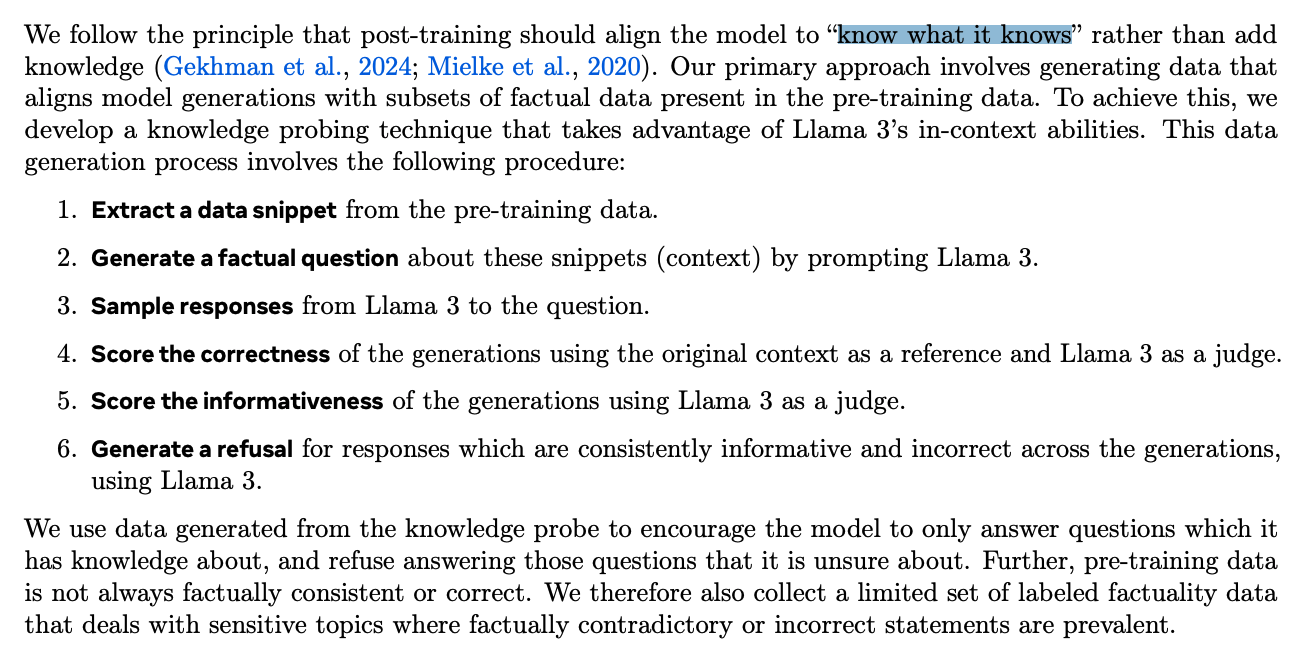

아이디어!

Pretraining과정에서 얻어진 이 아키텍처 어딘가에 "know what it knows 무엇을 알고 무엇을 모르는지"에 대한 뉴런이 존재함. 그런데, Post-training과정에 필요한 '모르겠습니다 답변'을 하는 학습 데이터셋을 사람이 만들 때에 위 뉴런과 hardwire 직접 연결할 방법이 없음.

따라서, 모델이 답변을 모르는 질문들을 찾아서 (by interrogation!) 이에 대해서만 모른다라고 답변하는 instruct데이터셋을 추가해서 학습시킨다면, 

모델이 Post-training과정에서 스스로 'know what it knows 뉴런'과 '모르겠습니다 답변'을 연결할 수 있음.

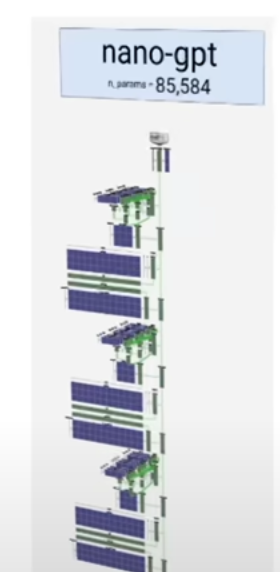

interrogation 자동화 방법

(1) 위키피디아 등에서 내용을 발췌해서 그 내용을 바탕으로 질의답변을 생성하게 함.

e.g. Dominik Hasek이 Stanley Cup을 몇번 우승했는가?

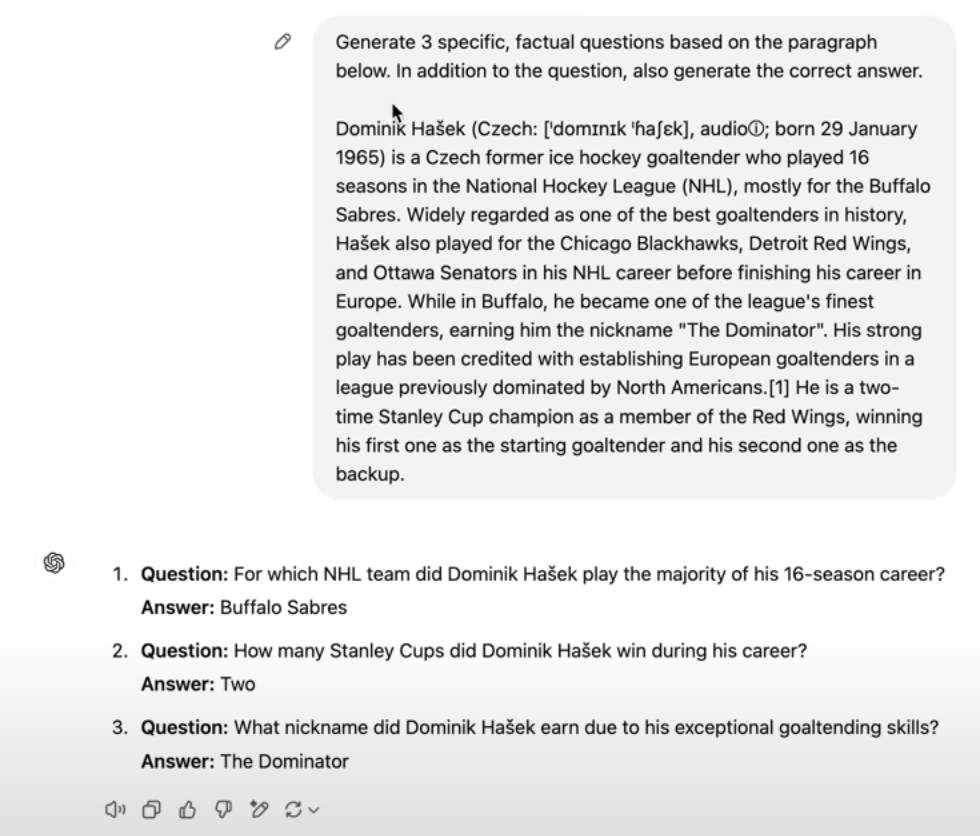


(2) 위 질문을 모델에게 여러번 물어봐서, 일관된 맞은 답변을 하는지 확인

e.g. Dominik Hasek이 Stanley Cup을 몇번 우승했는가? 우승한 적이 없다, 4번 우승했다 등 틀리고 일관되지 않음

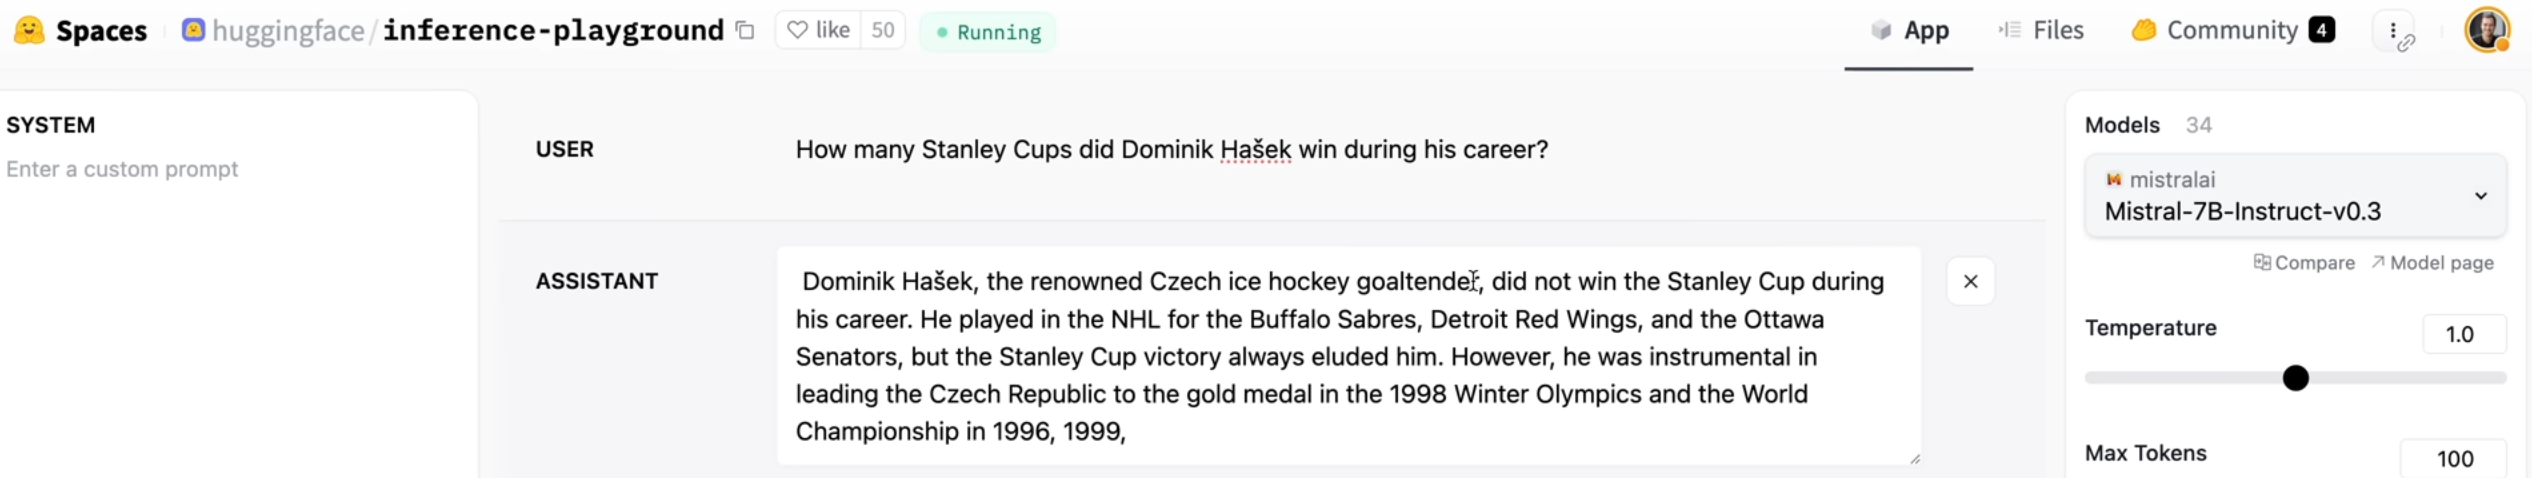

(3) 틀린 답변을 하는 질문들만 묶어서 "I'm sorry, I don't believe I know"라는 답변을 넣은 Instruct데이터셋을 추가하고 이를 바탕으로 Post-training을 하면, "know what it knows" 뉴런과 "모르겠습니다 답변"이 자연스럽게 연결됨!

이것이 Hallucination을 이완시키는 첫번째 방안이고,

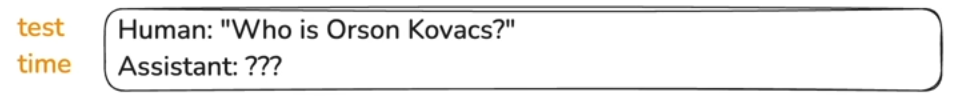

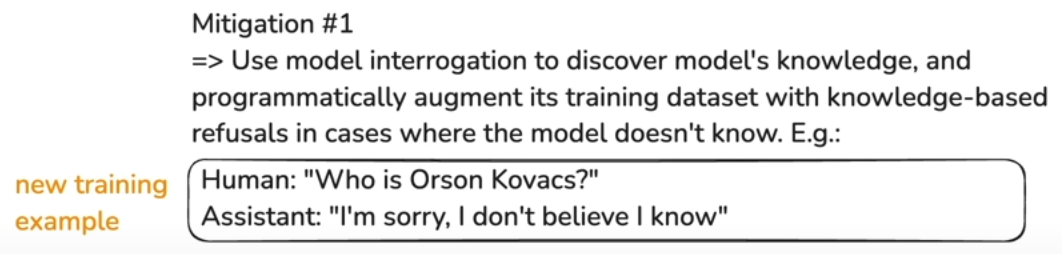


그런데, 사실 더 좋은 방법이 있음. 사람이 하는 것처럼 검색이라는 tool을 사용하게 하면 됨. ^^;

상세 : 모델이 답변을 잘 모를 때에,

잘 모른다는 답변을 하는 대신, 특수 토큰 <SEARCH_START>와, bing/google에 넣을 질문을 넣고 <SEARCH_END>라는 토큰을 생성해냄.
그리고, 인퍼런스하는 샘플링 프로그램에서 <SEARCH_END>라는 토큰을 보면, auto-regression을 pause하고, bing/google등의 검색결과를 복사해서 Context Window에 넣은 다음에 autoregression을 진행하는 방법을 취함

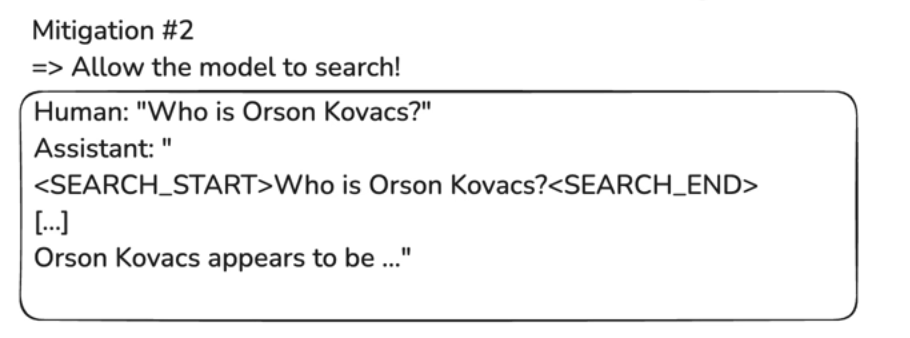

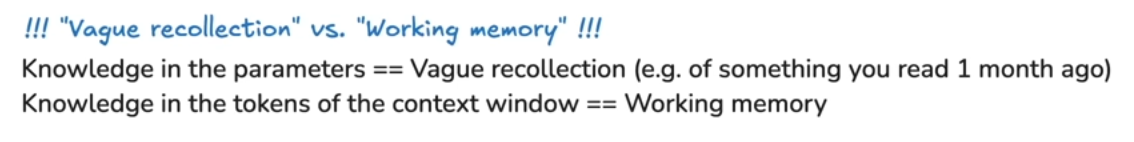

같은 맥락에서 ChatGPT 활용 팁을 하나 추가하자면,

모델 안에 있는 것은 회상과 같은 recall기억이고, 
컨텍스트 윈도우에 직접 넣는 것은 현재 활성화된 working memory이기 때문에,

"오만과 편견의 1장을 요약해줄래?" 라고만 물어봐서 아련한 기억에서 꺼내게 만드는 것보다,
"오만과 편견의 1장의 내용은 아래와 같아 --- 이 내용을 요약해줄래?" 라고 물어봐서 working memory로 바로 활성시키는 것이 더욱 좋은 답변을 이끌어내는 방법임.

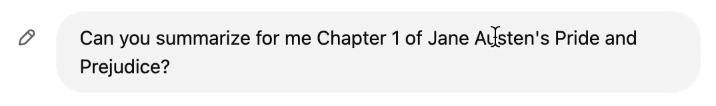

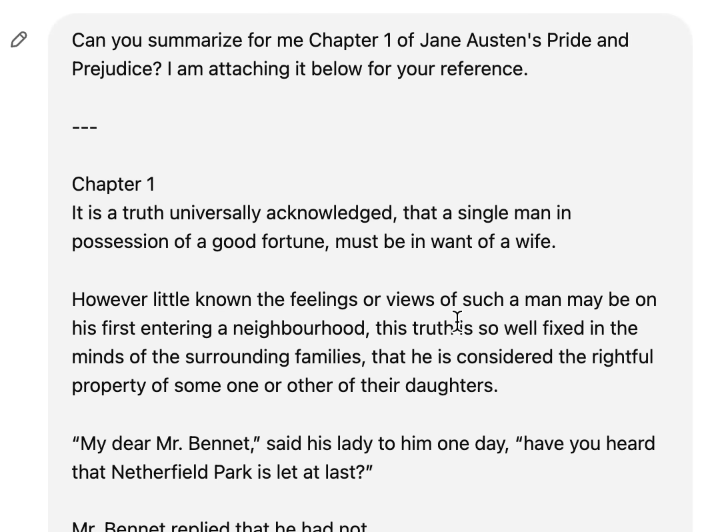